# Capstone Project:- AI Career Coach: Job Recommendations Powered by GenAI

## Problem Statement:

In the rapidly growing job market, job seekers often face challenges in identifying roles that align with their skills, especially when dealing with thousands of job listings spread across various platforms. Simultaneously, recruiters face inefficiencies in manually filtering resumes to find ideal candidates. This mismatch leads to missed opportunities and a time-consuming recruitment process.

There is a pressing need for an intelligent system that can analyze a candidate's resume and accurately recommend the most relevant job opportunities based on their skills.

## Project Objective:

The main objective of this project is to build a Resume-Based Job Recommendation System that:

1) Extracts skills from a user's resume using Natural Language Processing (NLP).

2) Matches those skills with job listings from a real dataset.

3) Recommends the top N job opportunities that best align with the candidate’s profile.

4) Helps bridge the gap between job seekers and employers by improving job-candidate matching efficiency.



## Load and Explore the Dataset

In [2]:
#Importing necessary libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output


In [7]:
#Load the datasets
jobs_df = pd.read_csv(r"C:\Users\ektan\Downloads\archive (2)\linkedin_job_postings.csv")
summary_df = pd.read_csv(r"C:\Users\ektan\Downloads\archive (2)\job_summary.csv")
skills_df = pd.read_csv(r"C:\Users\ektan\Downloads\archive (2)\job_skills.csv")


In [8]:
# 👀 Preview the first few rows of each dataset
print("Jobs:")
display(jobs_df.head())

print("Summary:")
display(summary_df.head())

print("Skills:")
display(skills_df.head())


Jobs:


,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


Summary:


,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...


Skills:


,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


## Data Cleaning & Preprocessing

In [9]:
#Check for missing values in each dataset
print("Missing values in Jobs dataset:")
display(jobs_df.isnull().sum())

print("Missing values in Summary dataset:")
display(summary_df.isnull().sum())

print("Missing values in Skills dataset:")
display(skills_df.isnull().sum())


Missing values in Jobs dataset:


job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64

Missing values in Summary dataset:


job_link       0
job_summary    0
dtype: int64

Missing values in Skills dataset:


job_link         0
job_skills    2085
dtype: int64

In [11]:
#Rename 'job_link' to 'job_id' in all datasets for consistency
jobs_df.rename(columns={"job_link": "job_id"}, inplace=True)
summary_df.rename(columns={"job_link": "job_id"}, inplace=True)
skills_df.rename(columns={"job_link": "job_id"}, inplace=True)


In [12]:
#Drop rows with missing company or job_location (only a few)
jobs_df.dropna(subset=["company", "job_location"], inplace=True)


In [13]:
#Drop rows with null job_skills (since skills are key for recommendation)
skills_df.dropna(subset=["job_skills"], inplace=True)


In [14]:
#Remove duplicates (safe measure)
jobs_df.drop_duplicates(subset=["job_id"], inplace=True)
summary_df.drop_duplicates(subset=["job_id"], inplace=True)
skills_df.drop_duplicates(subset=["job_id", "job_skills"], inplace=True)


In [15]:
#Reset index after cleaning
jobs_df.reset_index(drop=True, inplace=True)
summary_df.reset_index(drop=True, inplace=True)
skills_df.reset_index(drop=True, inplace=True)


In [16]:
#Final check
print("Jobs Shape:", jobs_df.shape)
print("Summary Shape:", summary_df.shape)
print("Skills Shape:", skills_df.shape)

print("Nulls in Jobs:")
display(jobs_df.isnull().sum())

print("Nulls in Summary:")
display(summary_df.isnull().sum())

print("Nulls in Skills:")
display(skills_df.isnull().sum())


Jobs Shape: (1348424, 14)
Summary Shape: (1297332, 2)
Skills Shape: (1294296, 2)
Nulls in Jobs:


job_id                 0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64

Nulls in Summary:


job_id         0
job_summary    0
dtype: int64

Nulls in Skills:


job_id        0
job_skills    0
dtype: int64

## Merging Datasets & Creating Master Job Table

We'll merge the three cleaned datasets into one master DataFrame using job_id as the key.

In [17]:
#Merge Jobs with Summary using job_id
job_data = pd.merge(jobs_df, summary_df, on="job_id", how="inner")

#Merge the result with Skills using job_id
job_data = pd.merge(job_data, skills_df, on="job_id", how="inner")

#Reset index
job_data.reset_index(drop=True, inplace=True)

#Show shape and preview
print("Final Merged Dataset Shape:", job_data.shape)
display(job_data.head())


Final Merged Dataset Shape: (1294268, 16)


,job_id,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_summary,job_skills
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,Responsibilities\nJob Description Summary\nJob...,"Medical equipment sales, Key competitors, Term..."
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,Employment Type:\nFull time\nShift:\nDescripti...,"Nursing, Bachelor of Science in Nursing, Maste..."
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,Job Details\nDescription\nWhat You'll Do\nAs a...,"Restaurant Operations Management, Inventory Ma..."
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,Who We Are\nRand Realty is a family-owned brok...,"Real Estate, Customer Service, Sales, Negotiat..."
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,Employment Type:\nFull time\nShift:\n12 Hour N...,"Nursing, BSN, Medical License, Virtual RN, Nur..."


Why this matters:-
This final table will contain:

1) Job title, company, location, job type

2) Full job summary (text)

3) Extracted job skills

Which will help us later:

1) Build NLP pipelines for skill-matching

2) Generate embeddings for GenAI recommendations

3) Build filtering or ranking logic

## Exploratory Data Analysis (EDA)

#### 1.Top Job Titles

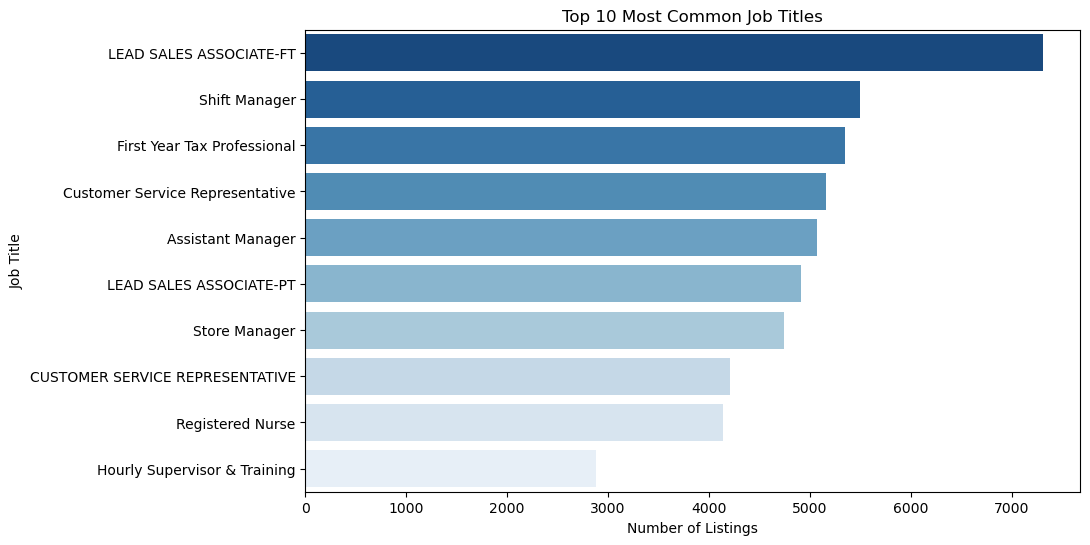

In [18]:
#Top 10 most common job titles
top_titles = job_data['job_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette="Blues_r")
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.show()


#### 2.Top Companies Hiring

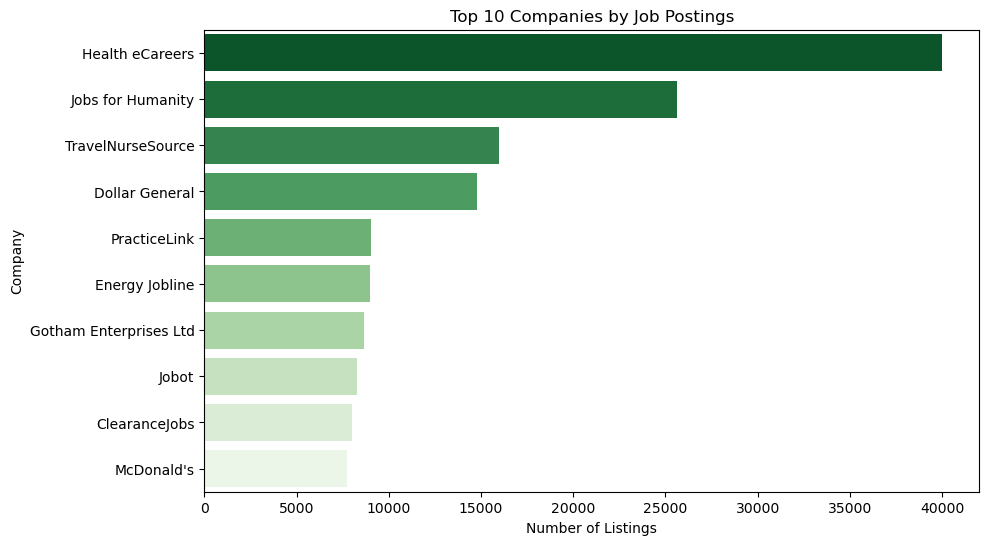

In [19]:
#Top 10 companies by job postings
top_companies = job_data['company'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="Greens_r")
plt.title("Top 10 Companies by Job Postings")
plt.xlabel("Number of Listings")
plt.ylabel("Company")
plt.show()


#### 3.Top Job Locations

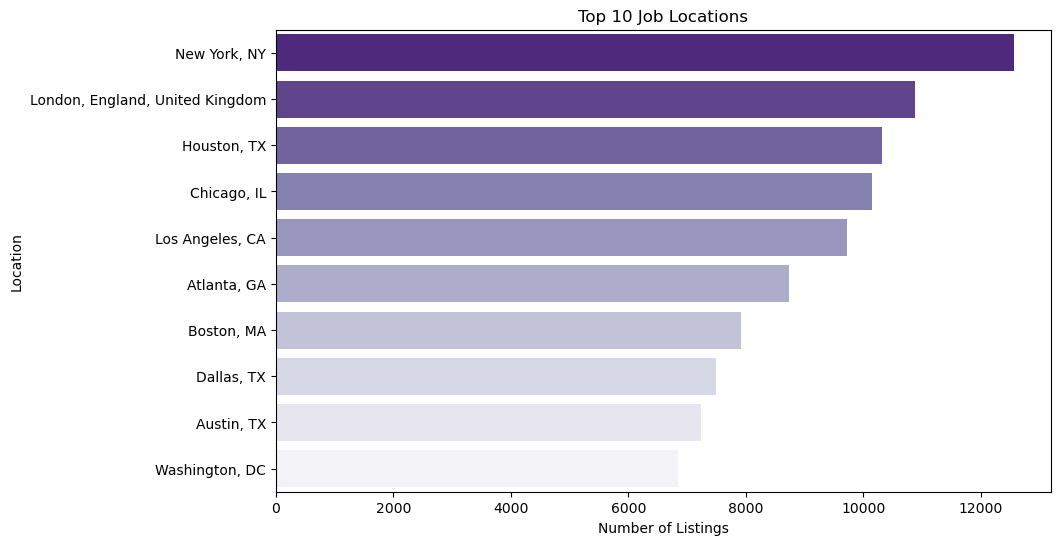

In [20]:
#Top 10 job locations
top_locations = job_data['job_location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="Purples_r")
plt.title("Top 10 Job Locations")
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.show()


#### 4.Word Cloud of Job Summaries

In [22]:
!pip install wordcloud


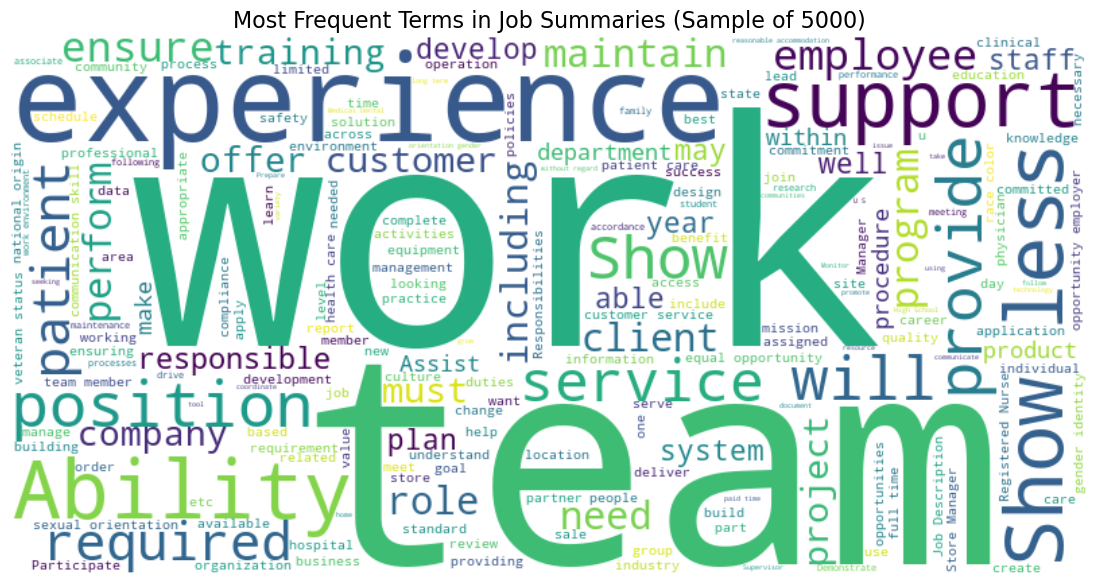

In [24]:
from wordcloud import WordCloud

# Limit to first 5000 job summaries to avoid memory issues
text = ' '.join(job_data['job_summary'].dropna().astype(str).head(5000))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Terms in Job Summaries (Sample of 5000)", fontsize=16)
plt.show()


## Skills Exploration and Analysis

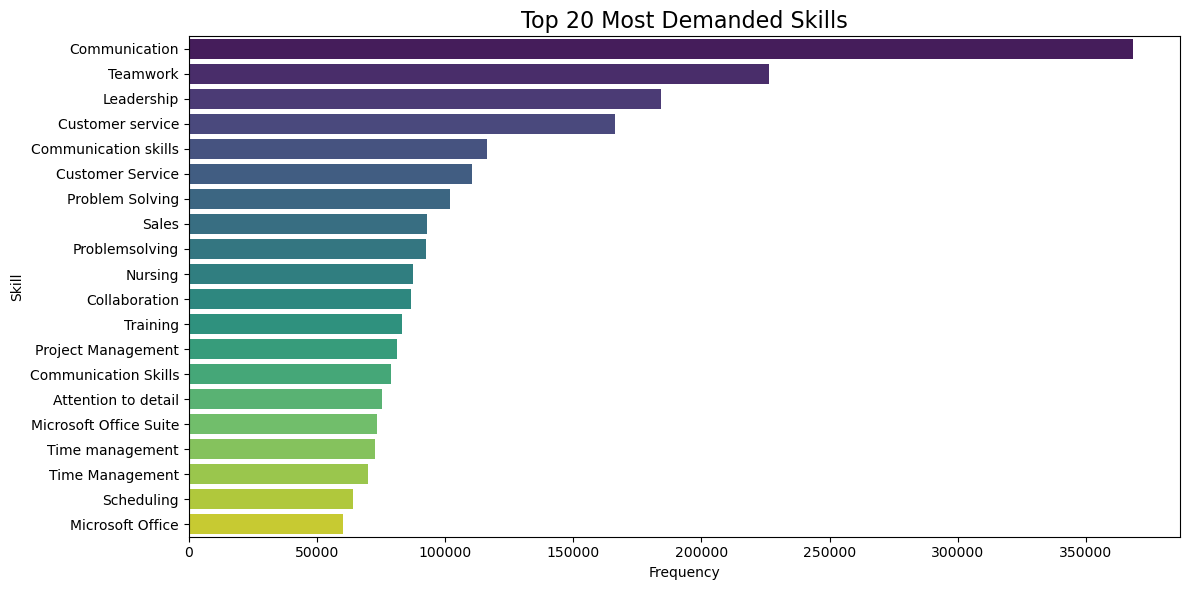

In [25]:
# Drop NaN values in job_skills column
skills_clean = skills_df['job_skills'].dropna()

# Split skills (they're comma-separated), flatten into one list
all_skills = []
for skills in skills_clean:
    all_skills.extend([skill.strip() for skill in skills.split(',')])

# Convert into a DataFrame for frequency counting
skills_series = pd.Series(all_skills)
top_skills = skills_series.value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
plt.title("Top 20 Most Demanded Skills", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


## Job Recommendation Logic (Basic Skill Matching)

We'll now implement a simple job recommendation system based on the user's input skills. Here's the idea:

1) A user will input a list of skills (e.g., Python, SQL)

2) We'll recommend jobs from the dataset that match most closely with those skills

In [39]:
def recommend_jobs(user_skills, top_n=10):
    # Convert to lowercase for comparison
    user_skills = [skill.lower() for skill in user_skills]

    # Drop rows with null job_skills
    valid_skills_df = skills_df.dropna(subset=['job_skills']).copy()
    
    # Convert job_skills string to list and lowercase
    valid_skills_df['job_skills'] = valid_skills_df['job_skills'].apply(lambda x: [s.strip().lower() for s in str(x).split(',')])
    
    # Calculate match score
    valid_skills_df['match_score'] = valid_skills_df['job_skills'].apply(lambda skills: len(set(user_skills) & set(skills)))
    
    # Filter jobs with at least 1 match
    matched_jobs = valid_skills_df[valid_skills_df['match_score'] > 0]
    matched_jobs = matched_jobs.sort_values(by='match_score', ascending=False).head(top_n)

    # Merge with job details
    final_jobs = pd.merge(matched_jobs, jobs_df, on='job_id', how='left')
    
    return final_jobs[['job_title', 'company', 'job_location', 'job_skills', 'match_score']]


In [40]:
user_input_skills = ['Python', 'Machine Learning', 'SQL', 'Pandas']
recommendations = recommend_jobs(user_input_skills, top_n=10)
display(recommendations)


,job_title,company,job_location,job_skills,match_score
0,"Data Analyst (Bangkok Based, relocation provided)",Agoda,"Dallas, TX","[data representation, data analysis, sql, data...",4
1,Data Analyst Lead - GenAI Specialist,Capgemini,"New York, United States","[ai, machine learning, deep learning, natural ...",4
2,"Senior Analyst / Analyst (Bangkok Based, reloc...",Agoda,"Miami, FL","[google, bing, baidu, naver, facebook, twitter...",4
3,"Staff Machine Learning Engineer, Series A",Recruiting from Scratch,"Los Angeles, CA","[machine learning, python, numpy, pandas, numb...",4
4,Product Manager - Magic Firewall,Cloudflare,"Kansas City, MO","[product management, software development, dat...",4
5,(Global Oil Gas) Senior Data Scientist Expert,MatchaTalent,"Dallas, TX","[data science, artificial intelligence, machin...",4
6,Distinguished Applied Researcher,Capital One,"McLean, VA","[pytorch, aws ultraclusters, huggingface, ligh...",4
7,Python Developer,Matlen Silver,"Alpharetta, GA","[python, data science, software development, o...",4
8,AI Engineer,NLP Logix,"Jacksonville, FL","[ai engineering, machine learning, advanced an...",4
9,Senior Machine Learning Engineer,Hour Consulting,"North York, Ontario, Canada","[machine learning, nlp, cv, python, sql, numpy...",4


## NLP Resume Matching

In [51]:
!pip install PyMuPDF


   ---------------------------------------- 0.0/16.6 MB ? eta -:--:--
    --------------------------------------- 0.3/16.6 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.6 MB 2.2 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/16.6 MB 1.9 MB/s eta 0:00:09
   --- ------------------------------------ 1.6/16.6 MB 2.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.8/16.6 MB 1.9 MB/s eta 0:00:08
   ----- ---------------------------------- 2.1/16.6 MB 1.9 MB/s eta 0:00:08
   ----- ---------------------------------- 2.4/16.6 MB 1.6 MB/s eta 0:00:09
   ------ --------------------------------- 2.6/16.6 MB 1.7 MB/s eta 0:00:09
   ------- -------------------------------- 3.1/16.6 MB 1.7 MB/s eta 0:00:08
   -------- ------------------------------- 3.7/16.6 MB 1.7 MB/s eta 0:00:08
   ---------- ----------------------------- 4.2/16.6 MB 1.9 MB/s eta 0:00:07
   ---------- ----------------------------- 4.5/16.6 MB 1.9 MB/s eta 0:00:07
   ----------

In [53]:
import fitz  # PyMuPDF

# Replace this path with your actual local path
file_path = r"C:\Users\ektan\Downloads\EktaDA_Resume.pdf"   #give resume file's path here

# Extract text
with fitz.open(file_path) as doc:
    resume_text = ""
    for page in doc:
        resume_text += page.get_text()

print("Resume text extracted successfully.")


Resume text extracted successfully.


In [54]:
# Define a list of top job-related skills
top_skills_list = ['python', 'sql', 'machine learning', 'deep learning', 'excel', 'power bi',
                   'communication', 'Excel' , 'Pandas' , 'NumPy' , 'MongoDB' , 'Data Cleaning' , 'Data Visualization' ,'Problem-solving',
                   'Communication' , 'Adaptability' , 'Creativity']

# Extract matched skills
extracted_skills = [skill for skill in top_skills_list if skill in resume_text.lower()]
print("Extracted Skills from Resume:", extracted_skills)


Extracted Skills from Resume: ['python', 'sql', 'excel', 'power bi', 'communication']


In [55]:
def recommend_jobs(user_skills, top_n=10):
    # Match score based on overlapping skills
    skills_df['match_score'] = skills_df['job_skills'].apply(
        lambda skills: len(set(user_skills).intersection(set(skills.lower().split(', '))))
    )

    matched_jobs = skills_df[skills_df['match_score'] > 0]
    matched_jobs = matched_jobs.sort_values(by='match_score', ascending=False).head(top_n)

    # Join with job details
    final_jobs = pd.merge(matched_jobs, jobs_df, on='job_id', how='left')
    return final_jobs[['job_title', 'company', 'job_location', 'job_skills', 'match_score']]


In [56]:
#get your top job matches
recommendations = recommend_jobs(extracted_skills, top_n=10)
display(recommendations)


,job_title,company,job_location,job_skills,match_score
0,"Sr PM, Process engineering, DP&R",Amazon,"Bellevue, WA","Data Analysis, Project Management, Process Imp...",5
1,Tax Services Manager - Financial Services Orga...,EY,"Boston, MA","Researching, Advising, Translating, Building, ...",5
2,"Sr. Analyst, Forecasting & Analytics","Ross Stores, Inc.","New York, NY","Forecasting, Analytics, Data analysis, Problem...",5
3,Sales Intelligence Analyst,Johnson Controls,"Milwaukee, WI","Business intelligence, Data analytics, Data mo...",5
4,Senior Financial Reporting Analyst,"Liberty Personnel Services, Inc.","New York, NY","Financial Reporting, Budgeting, Cash Flow, Var...",5
5,Corporate Strategy Manager,TE Connectivity,"Elkhart County, IN","Strategy, Data analysis, Cloud computing, Inte...",5
6,Financial Analyst,Solar Innovations® Architectural Glazing Systems,"Maumee, OH","Financial Analysis, Accounting, Sales Forecast...",5
7,International Commercial Planner,Holland & Barrett,"Nuneaton, England, United Kingdom","Data Analysis, Reporting, Insight Generation, ...",5
8,"Senior Financial Analyst, Worldwide Customer S...",Amazon,"Seattle, WA","Finance, Business Analytics, Strategic Plannin...",5
9,Business Unit Analytics Manager – Oncology,AstraZeneca,"Mississauga, Ontario, Canada","Excel, Python, SQL, Power BI, PowerPoint, Word...",5


In [57]:
average_score = recommendations['match_score'].mean()
print(f"Average Skill Match Score: {average_score:.2f}")


Average Skill Match Score: 5.00


## Project Completed.........